In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                       

In [107]:
mobiledata=pd.read_excel("D:/analytics/Predictive_Analysis2/IOT_Time_Series_Analysis/data_vis_test.xlsx")

In [108]:
mobiledata.head()

,user_id,first_open_timestamp_micros,mobile_brand_name,device_model,Date
0,59e76cfd625fbbd42511a613,1506070442210000,Samsung,SM-G600FY,09/22/2017 08.54.02
1,59d06f7fb2cb0511457922c5,1506593056306000,Magicon,M2,09/28/2017 10.04.16
2,59ccf1575a6aa5143eab56d5,1506849953196000,Sony,C2004,10/01/2017 09.25.53
3,5a033767625fbbd4254d156c,1451606988851000,LYF,LS-4503,01/01/2016 00.09.49
4,59d1e15c34d477c22c195554,1505544941945000,Samsung,SM-J210F,09/16/2017 06.55.42


In [109]:
mobiledata.shape

(10000, 5)

In [110]:
mobiledata.Date=pd.to_datetime(mobiledata.first_open_timestamp_micros,unit="us")  #14digits-us, 16digits-ms, 19digits-ns

In [111]:
mobiledata.dtypes

user_id                                object
first_open_timestamp_micros             int64
mobile_brand_name                      object
device_model                           object
Date                           datetime64[ns]
dtype: object

In [112]:
mobiledata.head() 

,user_id,first_open_timestamp_micros,mobile_brand_name,device_model,Date
0,59e76cfd625fbbd42511a613,1506070442210000,Samsung,SM-G600FY,2017-09-22 08:54:02.210
1,59d06f7fb2cb0511457922c5,1506593056306000,Magicon,M2,2017-09-28 10:04:16.306
2,59ccf1575a6aa5143eab56d5,1506849953196000,Sony,C2004,2017-10-01 09:25:53.196
3,5a033767625fbbd4254d156c,1451606988851000,LYF,LS-4503,2016-01-01 00:09:48.851
4,59d1e15c34d477c22c195554,1505544941945000,Samsung,SM-J210F,2017-09-16 06:55:41.945


In [113]:
mobiledata['Year']=mobiledata.Date.apply(lambda x:x.year)
mobiledata['Month']=mobiledata.Date.apply(lambda x:x.month)
mobiledata['Week']=mobiledata.Date.apply(lambda x:x.week)
mobiledata['Weekdays']=mobiledata.Date.apply(lambda x:x.weekday())
mobiledata['Hour']=mobiledata.Date.apply(lambda x:x.hour)

In [114]:
mobiledata.head()

,user_id,first_open_timestamp_micros,mobile_brand_name,device_model,Date,Year,Month,Week,Weekdays,Hour
0,59e76cfd625fbbd42511a613,1506070442210000,Samsung,SM-G600FY,2017-09-22 08:54:02.210,2017,9,38,4,8
1,59d06f7fb2cb0511457922c5,1506593056306000,Magicon,M2,2017-09-28 10:04:16.306,2017,9,39,3,10
2,59ccf1575a6aa5143eab56d5,1506849953196000,Sony,C2004,2017-10-01 09:25:53.196,2017,10,39,6,9
3,5a033767625fbbd4254d156c,1451606988851000,LYF,LS-4503,2016-01-01 00:09:48.851,2016,1,53,4,0
4,59d1e15c34d477c22c195554,1505544941945000,Samsung,SM-J210F,2017-09-16 06:55:41.945,2017,9,37,5,6


In [115]:
mobiledata.mobile_brand_name.value_counts()


Samsung         2938
Xiaomi          1520
Vivo            1019
OPPO             929
Lenovo           548
Motorola         364
Micromax         330
LYF              271
Gionee           245
Lava             114
HTC               91
Coolpad           88
Intex             87
Asus              85
OnePlus           81
Huawei            75
Panasonic         74
Sony              65
LeTV              47
LG                42
YU                41
Karbonn           41
itel              26
Xolo              25
LeEco             24
iZoom             23
InFocus           18
Google            16
Tecno             14
Videocon          13
                ... 
Acer               5
Allview            5
SonyEricsson       5
Meitu              4
Lephone            4
BlackBerry         4
Reliance           3
Infinix            3
Sansui             3
ZTE                2
RCA                2
PiPO               2
Phicomm            2
Zen                2
Cubot              2
Penta              2
Meizu        

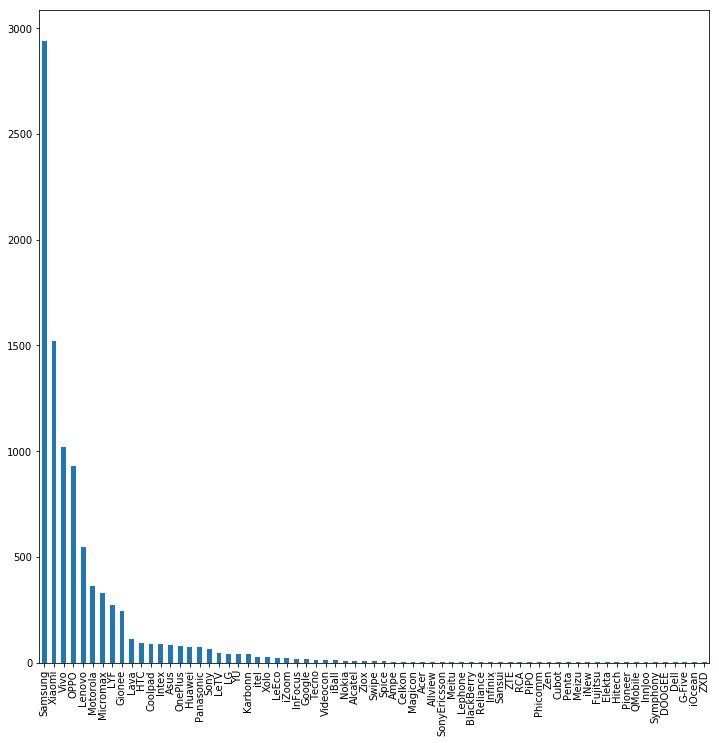

In [116]:
mobiledata.mobile_brand_name.value_counts().plot(kind="bar",figsize=(12,12))

In [117]:
mobiledata['Units']=1

In [118]:
popbrands=mobiledata.mobile_brand_name.value_counts().index[:10]

In [119]:
popbrands

Index(['Samsung', 'Xiaomi', 'Vivo', 'OPPO', 'Lenovo', 'Motorola', 'Micromax',
       'LYF', 'Gionee', 'Lava'],
      dtype='object')

In [124]:
mobiledata['Topbrands']=mobiledata.loc[~mobiledata.mobile_brand_name.isin(popbrands),'mobile_brand_name']='others'

In [125]:
for i in mobiledata.mobile_brand_name:
    if i in popbrands:
        mobiledata['TopBrands']=mobiledata.mobile_brand_name
    else:
        mobiledata['TopBrands']=='Others'

In [126]:
mobiledata.TopBrands.value_counts()

Samsung     2938
others      1722
Xiaomi      1520
Vivo        1019
OPPO         929
Lenovo       548
Motorola     364
Micromax     330
LYF          271
Gionee       245
Lava         114
Name: TopBrands, dtype: int64